In [45]:
from numpy import empty, zeros, max
from pylab import imshow, gray, show
import matplotlib.pyplot as plt

In [7]:
M = 100
V = 10
target = 1e-2

phi = zeros([M+1, M+1], float)
phi[0,:] = V
phiprime = empty([M+1, M+1], float)

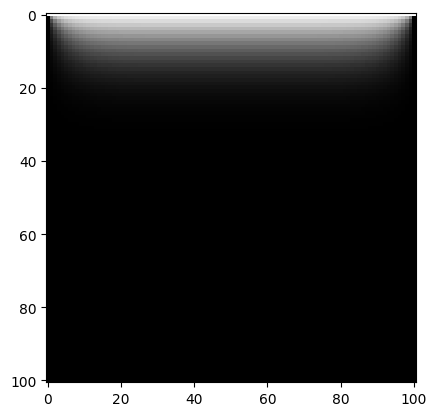

In [8]:
delta = 1.0
while delta > target:
    for i in range(M+1):
        for j in range(M+1):
            if i==0 or i==M or j==0 or j==M:
                phiprime[i, j] = phi[i, j]
            else:
                phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4
    delta = max(abs(phi-phiprime))
    phi, phiprime = phiprime, phi

imshow(phi)
gray()
show()

In [9]:
max(abs(phi))

10.0

### Problem 1 - relaxation mathod using Poisson equation

In [29]:
M = 100
V = 1
a, e0 = 1, 1
target = 1e-3

p_dens = zeros([M+1, M+1], float)
p_dens[20:40,60:80], phi[60:80, 20:40] = 1, -1

phi = zeros([M+1, M+1], float)
phi[20:40,60:80], phi[60:80, 20:40] = V, -V
phiprime = empty([M+1, M+1], float)

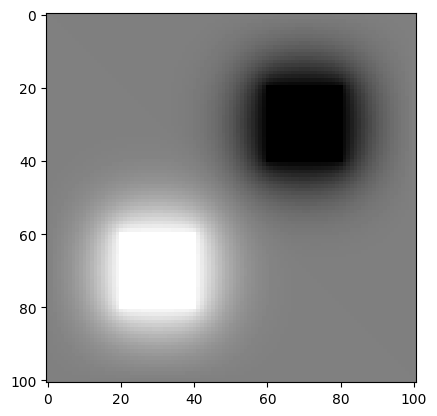

In [31]:
delta = 1.0

while delta > target:
    for i in range(M):
        for j in range(M):
            if ((i>=60 and i<=80) and (j>=20 and j<=40)):
                phiprime[i, j] = V
            elif ((i>=20 and i<=40) and (j>=60 and j<=80)):
                phiprime[i, j] = -V
            else:
                phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4 + p_dens[i, j]*(a**2)/(4*e0)
                
    delta = max(abs(phi-phiprime))
    phi, phiprime = phiprime, phi

imshow(phi)
gray()
show()

### Problem 2 - Use the Gauus-Seidel method to solve the Laplace equation

In [49]:
from time import monotonic

M = 31
tol = 1e-6
q = 1
e0 = 1
L = 1
deltamax = 10
w = 0.9

t1 = monotonic()
a = L/M
p = q/(a**2)

phi = zeros([M, M], float)

In [65]:
while (abs(deltamax > tol)):
    deltamax = 0
    for i in range(1, M-1):
        for j in range(1, M-1):
            if (i == int((M-1)/2)) and (j == int((M-1)/2)):
                phiprime = (1/4)*(phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1] + (p*a*a/e0))
                delta = phiprime - phi[i, j]
                phi[i, j] += (1 + w)*delta
            else:
                phiprime = (1/4)*(phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])
                delta = phiprime - phi[i, j]
                phi[i, j] += (1 + w)*delta
                
        if (abs(delta) > deltamax):
            deltamax = delta
    print(deltamax)

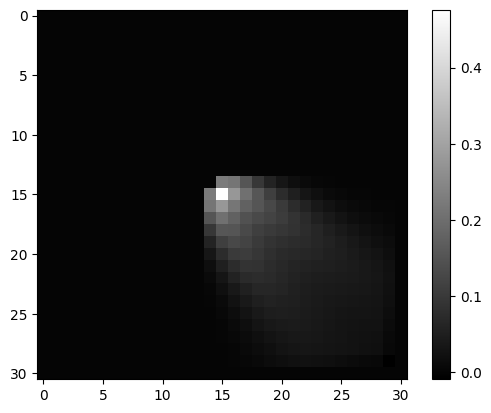

tempo gasto: 62.266 s


In [67]:
t2 = monotonic()
imshow(phi)
plt.colorbar()
show()

print(f'tempo gasto: {t2-t1:.3f} s')

### Problem 3 - eletronic capacitors

In [103]:
M = 100
V = 1
a, e0 = 1, 1
target = 1e-4

p_dens = zeros([M+1, M+1], float)
# p_dens[20:80, 20], phi[20:80, 80] = 1, -1

phi = zeros([M+1, M+1], float)
phi[20:80, 20], phi[20:80, 80] = V, -V
phiprime = empty([M+1, M+1], float)

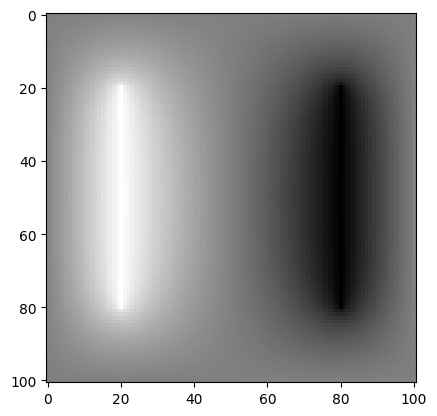

In [105]:
delta = 1.0

while delta > target:
    for i in range(M):
        for j in range(M):
            if ((j==20) and (i>=20 and i<=80)):
                phiprime[i, j] = V
            elif ((j==80) and (i>=20 and i<=80)):
                phiprime[i, j] = -V
            else:
                phiprime[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1])/4 + p_dens[i, j]*(a**2)/(4*e0)
                
    delta = max(abs(phi-phiprime))
    phi, phiprime = phiprime, phi

imshow(phi)
gray()
show()

### Problem 4 - thermal diffusion in the earth's crust